# Time Series Plots
Time series plots visualize data points ordered by time, revealing trends, seasonality, cycles, and anomalies over time. Essential for analyzing temporal patterns in stock prices, weather data, sales figures, sensor readings, and more.

# Matplotlib

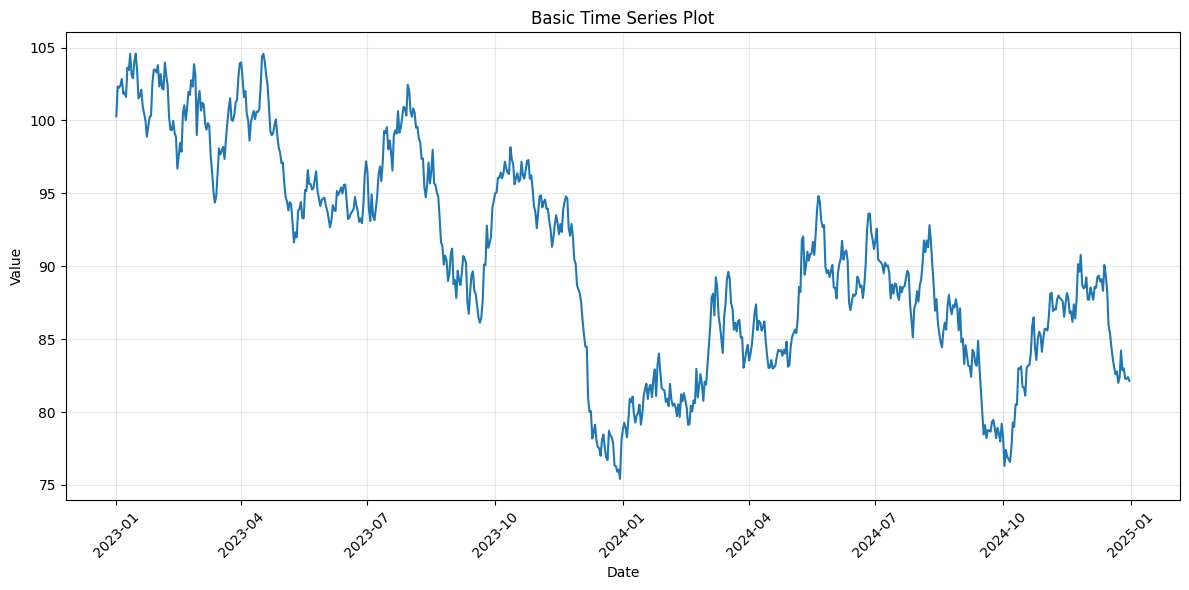

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Generate sample time series data
dates = pd.date_range(start='2023-01-01', end='2024-12-31', freq='D')
values = np.cumsum(np.random.randn(len(dates))) + 100

# Create basic time series plot
plt.figure(figsize=(12, 6))
plt.plot(dates, values)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Basic Time Series Plot')
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Pandas

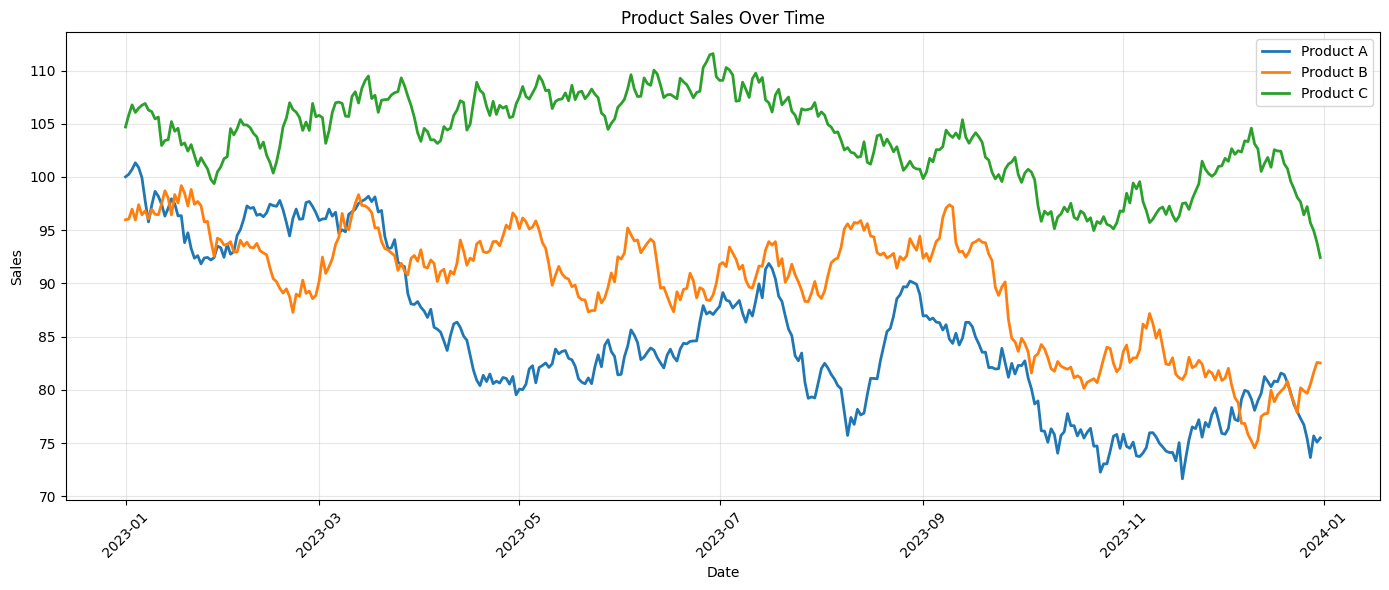

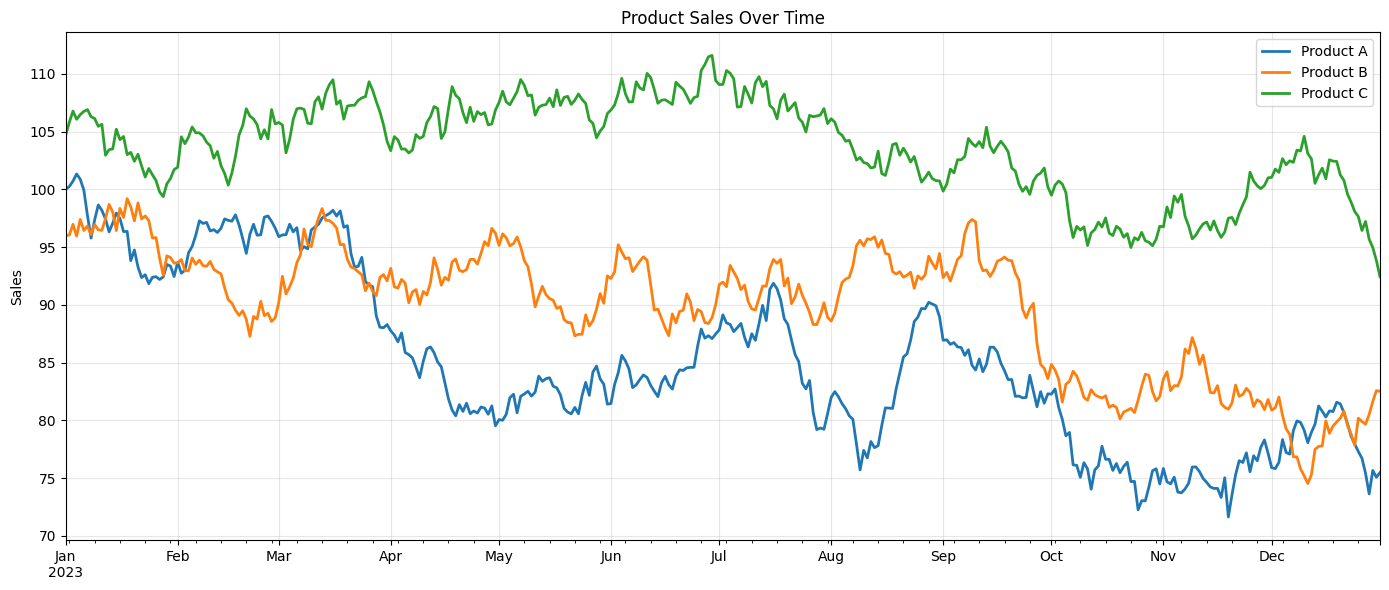

In [3]:
# Generate multiple series
dates = pd.date_range(start='2023-01-01', periods=365, freq='D')
series_a = np.cumsum(np.random.randn(365)) + 100
series_b = np.cumsum(np.random.randn(365)) + 95
series_c = np.cumsum(np.random.randn(365)) + 105

df_multi = pd.DataFrame({
    'Product A': series_a,
    'Product B': series_b,
    'Product C': series_c
}, index=dates)

# Plot multiple series
plt.figure(figsize=(14, 6))
plt.plot(df_multi.index, df_multi['Product A'], label='Product A', linewidth=2)
plt.plot(df_multi.index, df_multi['Product B'], label='Product B', linewidth=2)
plt.plot(df_multi.index, df_multi['Product C'], label='Product C', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Product Sales Over Time')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Or use pandas directly
df_multi.plot(figsize=(14, 6), linewidth=2, title='Product Sales Over Time')
plt.ylabel('Sales')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Interactive Time Series with Plotly


In [7]:
import plotly.graph_objects as go

# Create data
dates = pd.date_range(start='2020-01-01', periods=1460, freq='D')
values = np.cumsum(np.random.randn(len(dates))) + 100

# Create interactive plot
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=dates,
    y=values,
    mode='lines',
    name='Value',
    line=dict(color='blue', width=2)
))

# Add range slider
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all", label="All")
        ])
    )
)

fig.update_layout(
    title='Interactive Time Series with Range Slider',
    xaxis_title='Date',
    yaxis_title='Value',
    hovermode='x unified'
)

fig.show()

# Candlestick Chart (Financial Data)

In [8]:
# Generate OHLC (Open, High, Low, Close) data
dates = pd.date_range(start='2024-01-01', periods=100, freq='D')
base = 100
opens = base + np.cumsum(np.random.randn(100) * 2)
closes = opens + np.random.randn(100) * 3
highs = np.maximum(opens, closes) + np.abs(np.random.randn(100) * 2)
lows = np.minimum(opens, closes) - np.abs(np.random.randn(100) * 2)

# Create candlestick chart with plotly
fig = go.Figure(data=[go.Candlestick(
    x=dates,
    open=opens,
    high=highs,
    low=lows,
    close=closes
)])

fig.update_layout(
    title='Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False
)

fig.show()

# Heatmap for time series

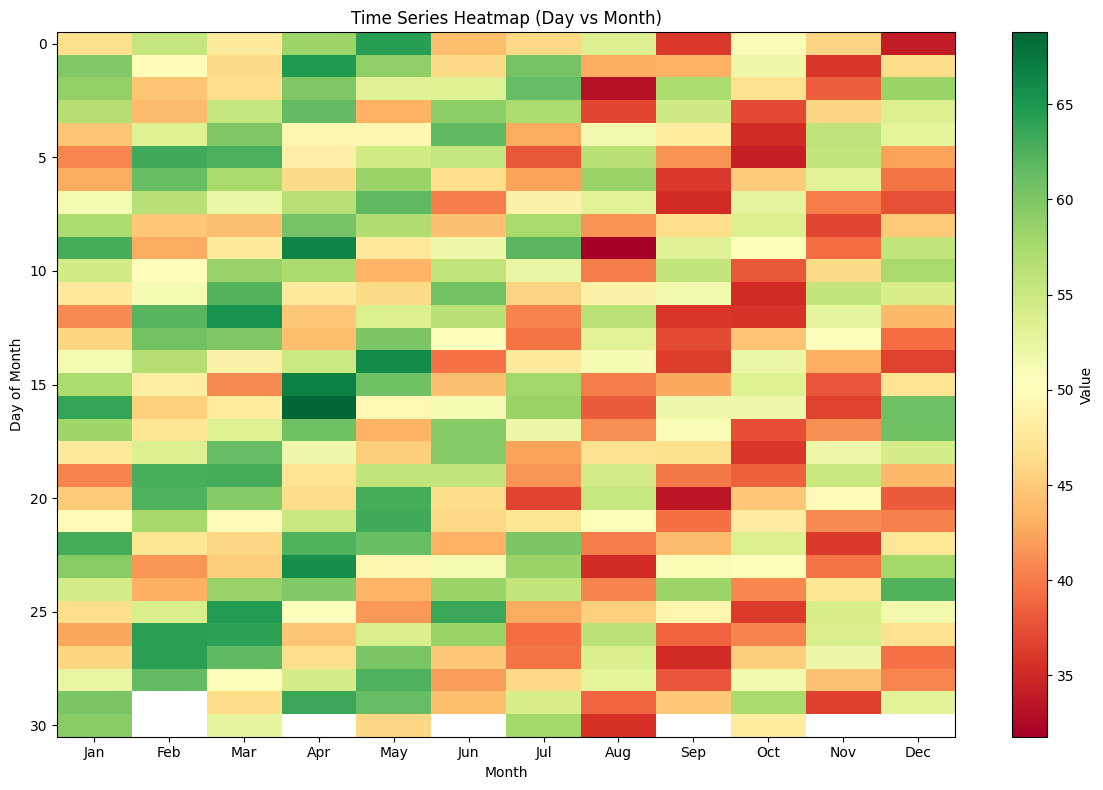

In [9]:
# Create data with daily and weekly patterns
dates = pd.date_range(start='2024-01-01', periods=365, freq='D')
df_pattern = pd.DataFrame(index=dates)
df_pattern['value'] = 50 + \
                      10 * np.sin(2 * np.pi * np.arange(365) / 7) + \
                      5 * np.sin(2 * np.pi * np.arange(365) / 365) + \
                      np.random.randn(365) * 2

# Create pivot for heatmap
df_pattern['month'] = df_pattern.index.month
df_pattern['day'] = df_pattern.index.day

pivot_data = df_pattern.pivot_table(values='value', index='day', columns='month')

# Plot heatmap
plt.figure(figsize=(12, 8))
plt.imshow(pivot_data, aspect='auto', cmap='RdYlGn', interpolation='nearest')
plt.colorbar(label='Value')
plt.xlabel('Month')
plt.ylabel('Day of Month')
plt.title('Time Series Heatmap (Day vs Month)')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

# Anomaly Detection Visualization

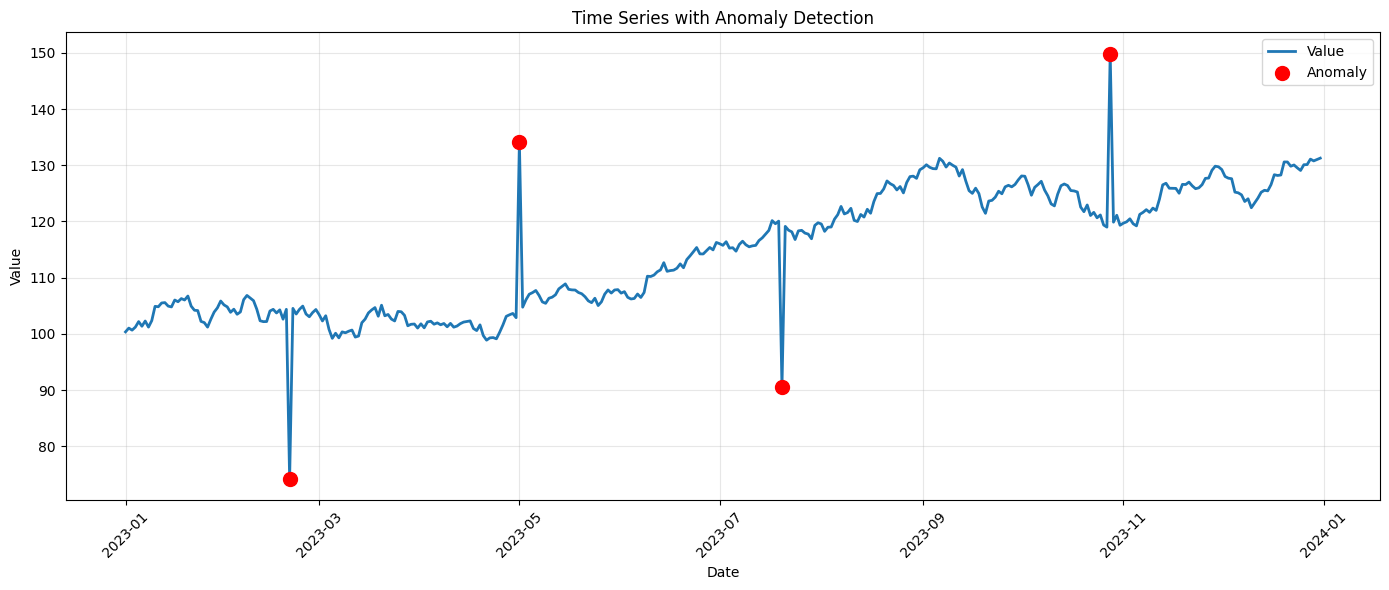

In [10]:
# Generate data with anomalies
dates = pd.date_range(start='2023-01-01', periods=365, freq='D')
values = np.cumsum(np.random.randn(365)) + 100

# Inject anomalies
anomaly_indices = [50, 120, 200, 300]
values[anomaly_indices] += np.random.choice([-30, 30], size=len(anomaly_indices))

df_anomaly = pd.DataFrame({'value': values}, index=dates)

# Simple anomaly detection using z-score
df_anomaly['rolling_mean'] = df_anomaly['value'].rolling(window=30).mean()
df_anomaly['rolling_std'] = df_anomaly['value'].rolling(window=30).std()
df_anomaly['z_score'] = (df_anomaly['value'] - df_anomaly['rolling_mean']) / df_anomaly['rolling_std']
df_anomaly['is_anomaly'] = np.abs(df_anomaly['z_score']) > 3

# Plot
plt.figure(figsize=(14, 6))
plt.plot(df_anomaly.index, df_anomaly['value'], label='Value', linewidth=2)
plt.scatter(df_anomaly[df_anomaly['is_anomaly']].index,
           df_anomaly[df_anomaly['is_anomaly']]['value'],
           color='red', s=100, label='Anomaly', zorder=5)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series with Anomaly Detection')
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()